In [1]:
import matplotlib as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
sns.set_palette("Paired",9)

All coding done by Nathan Cleary 

All coding done by Nathan Cleary 

In [2]:
df = pd.read_csv("IMDB_dataset2.csv") 
pd.options.display.max_columns = None

In [3]:
df

,Movie_Title,Movie_Genre,Movie_Rating,Movie_Runtime,Production_Company,IsTop10Company,director,IsTop20director,Writer,IsTop20Writer,Movie_Cast,IsTop10Cast,Release_Month,Release_Year,Movie_Score,IFMovie_Score>=6.3,Vote_Count,budget,Gross_Revenue,Profit,Profit Margin,IFProfit_Margin>=4.3%,Unnamed: 22
0,Stand by Me,Adventure,R,89,Columbia Pictures Corporation,1,Rob Reiner,1,Stephen King,1,Wil Wheaton,0,8,1986,8.1,1,299174,8000000,52287414,44287414,0.85,1,NaN
1,Ferris Bueller's Day Off,Comedy,PG-13,103,Paramount Pictures,1,John Hughes,0,John Hughes,1,Matthew Broderick,0,6,1986,7.8,1,264740,6000000,70136369,64136369,0.91,1,NaN
2,Top Gun,Action,PG,110,Paramount Pictures,1,Tony Scott,1,Jim Cash,0,Tom Cruise,0,5,1986,6.9,1,236909,15000000,179800601,164800601,0.92,1,NaN
3,Aliens,Action,R,137,Twentieth Century Fox Film Corporation,1,James Cameron,0,James Cameron,0,Sigourney Weaver,0,7,1986,8.4,1,540152,18500000,85160248,66660248,0.78,1,NaN
4,Flight of the Navigator,Adventure,PG,90,Walt Disney Pictures,1,Randal Kleiser,0,Mark H. Baker,0,Joey Cramer,0,8,1986,6.9,1,36636,9000000,18564613,9564613,0.52,1,NaN
5,Blue Velvet,Drama,R,120,De Laurentiis Entertainment Group (DEG),0,David Lynch,0,David Lynch,0,Isabella Rossellini,0,10,1986,7.8,1,146768,6000000,8551228,2551228,0.30,1,NaN
6,Pretty in Pink,Comedy,PG-13,96,Paramount Pictures,1,Howard Deutch,0,John Hughes,1,Molly Ringwald,0,2,1986,6.8,1,60565,9000000,40471663,31471663,0.78,1,NaN
7,The Fly,Drama,R,96,SLM Production Group,0,David Cronenberg,0,George Langelaan,0,Jeff Goldblum,0,8,1986,7.5,1,129698,15000000,40456565,25456565,0.63,1,NaN
8,Lucas,Comedy,PG-13,100,Twentieth Century Fox Film Corporation,1,David Seltzer,0,David Seltzer,0,Corey Haim,0,3,1986,6.8,1,12228,6000000,8200000,2200000,0.27,1,NaN
9,Big Trouble in Little China,Action,PG-13,99,Twentieth Century Fox Film Corporation,1,John Carpenter,0,Gary Goldman,0,Kurt Russell,0,7,1986,7.3,1,101678,25000000,11100000,-13900000,-1.25,0,NaN


In [4]:
df.describe()

,Movie_Runtime,IsTop10Company,IsTop20director,IsTop20Writer,IsTop10Cast,Release_Month,Release_Year,Movie_Score,IFMovie_Score>=6.3,Vote_Count,budget,Gross_Revenue,Profit,Profit Margin,IFProfit_Margin>=4.3%,Unnamed: 22
count,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4049.000000,4049.000000,0.0
mean,106.373179,0.368733,0.077550,0.050630,0.070882,6.655224,2001.294394,6.270635,0.533959,9.158438e+04,3.575662e+07,4.722608e+07,1.146946e+07,-12.193277,0.499877,NaN
std,16.975039,0.482521,0.267495,0.219268,0.256659,3.423309,9.368909,0.988031,0.498907,1.499241e+05,3.961123e+07,6.577088e+07,4.867822e+07,106.668523,0.500062,NaN
min,69.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1905.000000,1.500000,0.000000,1.030000e+02,7.000000e+03,1.434000e+03,-1.769219e+08,-2671.490000,0.000000,NaN
25%,95.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1994.000000,5.700000,0.000000,1.253100e+04,1.000000e+07,7.458269e+06,-9.954221e+06,-1.110000,0.000000,NaN
50%,103.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2001.000000,6.300000,1.000000,3.923300e+04,2.200000e+07,2.531429e+07,4.989390e+05,0.040000,0.000000,NaN
75%,115.000000,1.000000,0.000000,0.000000,0.000000,10.000000,2009.000000,6.900000,1.000000,1.037280e+05,4.500000e+07,5.965022e+07,2.137998e+07,0.510000,1.000000,NaN
max,271.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2017.000000,9.300000,1.000000,1.861666e+06,3.000000e+08,9.366622e+08,6.916622e+08,1.000000,1.000000,NaN


In [5]:
df = df.drop(columns=['Unnamed: 22'])

D:\School\Spring2019\IntroPython\PythonInstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


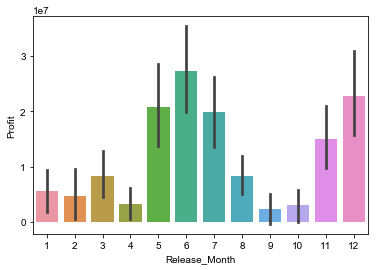

In [6]:
sns.barplot(x="Release_Month", y="Profit", data=df)
sns.set(font_scale=2)


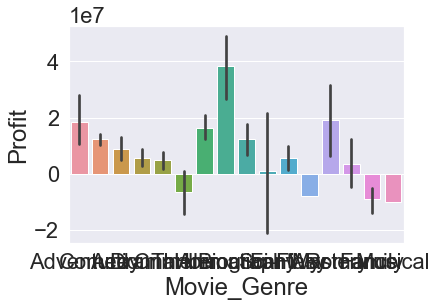

In [7]:
sns.barplot(x="Movie_Genre", y="Profit", data=df)

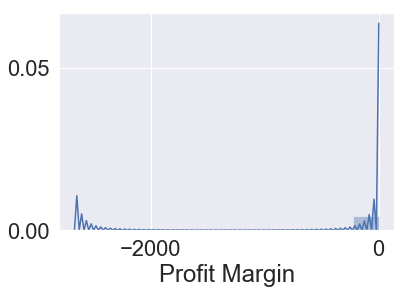

In [8]:
sns.distplot(df['Profit Margin'],bins=12)
sns.set(font_scale=4)

In [9]:
df.head(1)

,Movie_Title,Movie_Genre,Movie_Rating,Movie_Runtime,Production_Company,IsTop10Company,director,IsTop20director,Writer,IsTop20Writer,Movie_Cast,IsTop10Cast,Release_Month,Release_Year,Movie_Score,IFMovie_Score>=6.3,Vote_Count,budget,Gross_Revenue,Profit,Profit Margin,IFProfit_Margin>=4.3%
0,Stand by Me,Adventure,R,89,Columbia Pictures Corporation,1,Rob Reiner,1,Stephen King,1,Wil Wheaton,0,8,1986,8.1,1,299174,8000000,52287414,44287414,0.85,1


In [10]:
x = df.drop(columns=['Movie_Title','Movie_Rating','Movie_Genre','Production_Company','director','Writer','Profit Margin',
                     'Movie_Cast','IFProfit_Margin>=4.3%','Release_Year','Vote_Count','budget','Profit','IFMovie_Score>=6.3','Gross_Revenue'])

In [11]:
x.head(1)

,Movie_Runtime,IsTop10Company,IsTop20director,IsTop20Writer,IsTop10Cast,Release_Month,Movie_Score
0,89,1,1,1,0,8,8.1


In [12]:
y = df['IFProfit_Margin>=4.3%'].values

In [13]:
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
knn = KNeighborsClassifier(n_neighbors = 8)

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [17]:
knn.predict(x_test)[0:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [18]:
knn.score(x_test, y_test)

0.5567901234567901

In [19]:
knn_cv = KNeighborsClassifier(n_neighbors=8)

In [20]:
cv_scores = cross_val_score(knn_cv, x, y, cv=5)

In [21]:
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.54814815 0.56419753 0.5382716  0.5382716  0.54388133]
cv_scores mean:0.5465540447740695


In [22]:
k_range = range(1, 11)

In [23]:
scores = []

In [24]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.5419753086419753, 0.5493827160493827, 0.5419753086419753, 0.5469135802469136, 0.5444444444444444, 0.5432098765432098, 0.554320987654321, 0.5567901234567901, 0.5481481481481482, 0.5444444444444444]


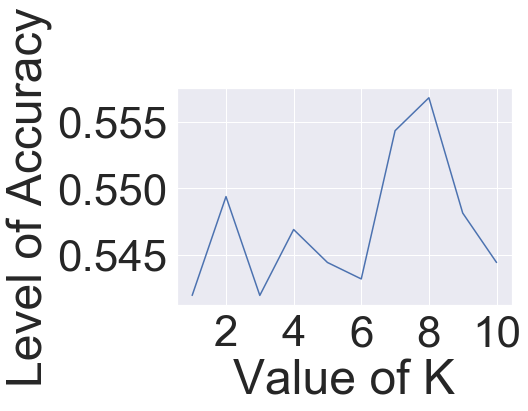

In [25]:
ax = sns.lineplot(x=k_range, y=scores)
ax.set(xlabel='Value of K', ylabel='Level of Accuracy')
sns.set(font_scale=2)

In [26]:
x.head(1)

,Movie_Runtime,IsTop10Company,IsTop20director,IsTop20Writer,IsTop10Cast,Release_Month,Movie_Score
0,89,1,1,1,0,8,8.1


In [27]:
knn = KNeighborsClassifier(n_neighbors=8)

In [28]:
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [29]:
knn.predict([[100,0,0,0,1,9,1]])

array([1], dtype=int64)

In [30]:
df['Movie_Genre'].value_counts()

Comedy       1300
Action        930
Drama         661
Crime         303
Adventure     235
Horror        191
Animation     186
Biography     165
Fantasy        27
Mystery        23
Sci-Fi          9
Thriller        7
Romance         6
Family          4
Musical         1
War             1
Name: Movie_Genre, dtype: int64

In [31]:
df.head(1)

,Movie_Title,Movie_Genre,Movie_Rating,Movie_Runtime,Production_Company,IsTop10Company,director,IsTop20director,Writer,IsTop20Writer,Movie_Cast,IsTop10Cast,Release_Month,Release_Year,Movie_Score,IFMovie_Score>=6.3,Vote_Count,budget,Gross_Revenue,Profit,Profit Margin,IFProfit_Margin>=4.3%
0,Stand by Me,Adventure,R,89,Columbia Pictures Corporation,1,Rob Reiner,1,Stephen King,1,Wil Wheaton,0,8,1986,8.1,1,299174,8000000,52287414,44287414,0.85,1


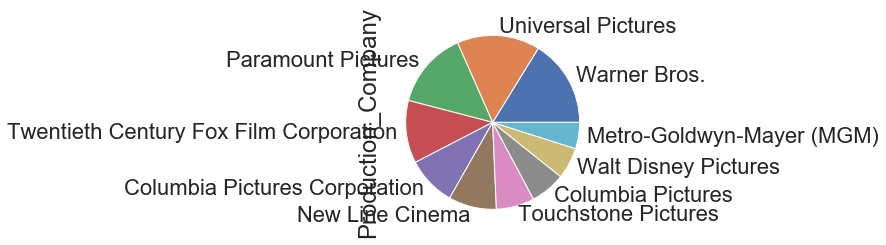

In [32]:
df.Production_Company.value_counts()[:10].plot(kind='pie')
sns.set(font_scale=1)

In [33]:
xbar = df['Production_Company'].value_counts()[:10]

In [34]:
df['Production_Company'].value_counts()[:10]

Warner Bros.                              242
Universal Pictures                        230
Paramount Pictures                        214
Twentieth Century Fox Film Corporation    174
Columbia Pictures Corporation             137
New Line Cinema                           133
Touchstone Pictures                       106
Columbia Pictures                          97
Walt Disney Pictures                       87
Metro-Goldwyn-Mayer (MGM)                  73
Name: Production_Company, dtype: int64

In [35]:
df[df.columns[1:]].corr()['IFProfit_Margin>=4.3%'][:]

Movie_Runtime            0.021905
IsTop10Company           0.082606
IsTop20director          0.016693
IsTop20Writer            0.039485
IsTop10Cast              0.012579
Release_Month            0.002717
Release_Year             0.025898
Movie_Score              0.224415
IFMovie_Score>=6.3       0.179488
Vote_Count               0.278725
budget                  -0.032573
Gross_Revenue            0.402208
Profit                   0.569943
Profit Margin            0.119057
IFProfit_Margin>=4.3%    1.000000
Name: IFProfit_Margin>=4.3%, dtype: float64

In [36]:
df[df.columns[1:]].corr()['Profit Margin'][:]

Movie_Runtime            0.037628
IsTop10Company           0.074296
IsTop20director          0.001645
IsTop20Writer            0.024675
IsTop10Cast              0.004540
Release_Month            0.015076
Release_Year            -0.004594
Movie_Score              0.063459
IFMovie_Score>=6.3       0.063382
Vote_Count               0.055683
budget                   0.054177
Gross_Revenue            0.083734
Profit                   0.069050
Profit Margin            1.000000
IFProfit_Margin>=4.3%    0.119057
Name: Profit Margin, dtype: float64

In [37]:
xbar = df['Production_Company'].value_counts()[:10].index
xbar

Index(['Warner Bros.', 'Universal Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation',
       'Columbia Pictures Corporation', 'New Line Cinema',
       'Touchstone Pictures', 'Columbia Pictures', 'Walt Disney Pictures',
       'Metro-Goldwyn-Mayer (MGM)'],
      dtype='object')

In [38]:
df2 = df[df.IsTop10Company == 1]

D:\School\Spring2019\IntroPython\PythonInstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


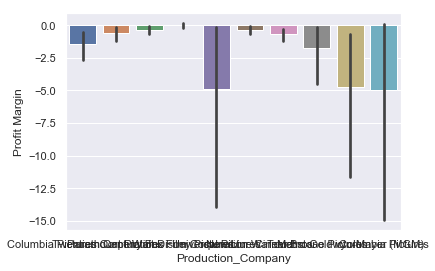

In [39]:
sns.barplot(x="Production_Company", y="Profit Margin", data=df2)
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=1.2)

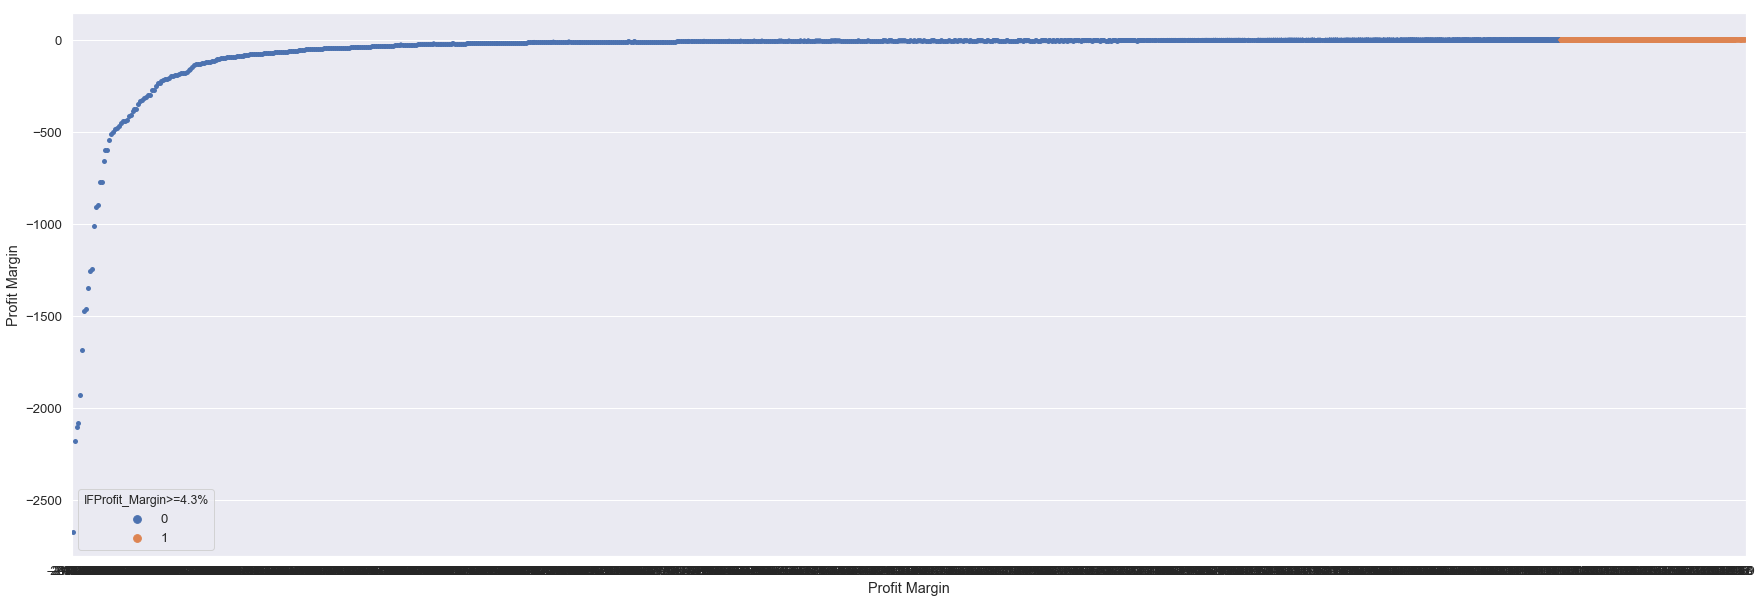

In [42]:
ax = sns.stripplot(x="Profit Margin", y="Profit Margin", hue="IFProfit_Margin>=4.3%",data=df, jitter=.01)